In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/csvf_ile/Phishing_Email.csv')

In [ ]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
df.tail()

,Unnamed: 0,Email Text,Email Type
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email
18649,18650,empty,Phishing Email


In [ ]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [ ]:
df.shape


(17538, 2)

In [ ]:
df['Email Type'].value_counts()

Email Type
Safe Email        10980
Phishing Email     6558
Name: count, dtype: int64

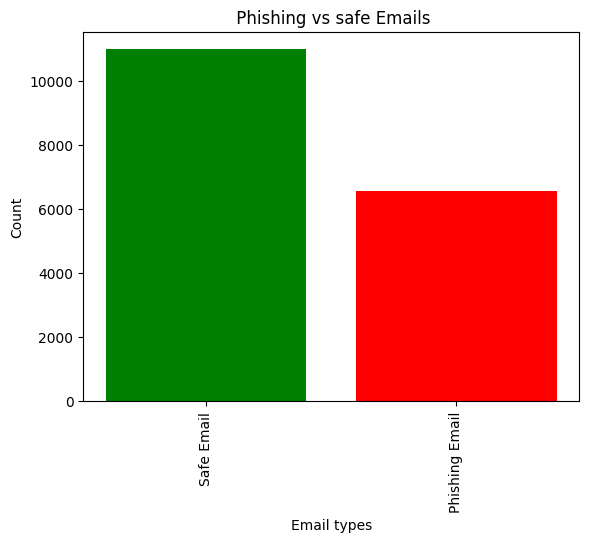

In [ ]:
result=df['Email Type'].value_counts()
x=result.index
y=result.values
plt.bar(x,y,color=['green','red'])
plt.title(' Phishing vs safe Emails')
plt.xlabel('Email types')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
lbl = LabelEncoder()
df['Email Type'] = lbl.fit_transform(df['Email Type'])

In [ ]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0


In [ ]:

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['Email Text']=df['Email Text'].apply(preprocess_text)

In [ ]:
tf = TfidfVectorizer(stop_words='english',max_features=10000)
feature_x = tf.fit_transform(df['Email Text']).toarray()

In [ ]:
y_tf = np.array(df['Email Type'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature_x,y_tf,test_size=0.2,random_state=0)

In [ ]:
# Random forest classifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1351
           1       0.99      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508

0.9780501710376283


In [ ]:
# Naive bayes
#gnb=GaussianNB()
#gnb.fit(x_train,y_train)
#y_predgnd=gnb.predict(x_test)

In [ ]:
#print(accuracy_score(y_test,y_predgnd))

In [ ]:
#print(classification_report(y_test,y_predgnd))

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_predmnb=mnb.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predmnb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1351
           1       0.98      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.98      0.98      0.98      3508



In [ ]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_predbnb=bnb.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predbnb))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1351
           1       0.99      0.87      0.93      2157

    accuracy                           0.91      3508
   macro avg       0.91      0.93      0.91      3508
weighted avg       0.93      0.91      0.92      3508



In [ ]:
# Decision Tree Classifier
#dtr=DecisionTreeClassifier()
#dtr.fit(x_train,y_train)
#y_preddtr=dtr.predict(x_test)

In [ ]:
#print(classification_report(y_test,y_preddtr))
#print(accuracy_score(y_test,y_preddtr))

In [ ]:
#Boosting
#xgb = XGBClassifier()
#xgb.fit(x_train,y_train)
#y_predxgb=xgb.predict(x_test)

In [ ]:
#print(classification_report(y_test,y_predxgb))
#print(accuracy_score(y_test,y_predxgb))


In [ ]:
models = [ BernoulliNB(), MultinomialNB(),RandomForestClassifier()]
model_names = ['BernoulliNB', 'MultinomialNB','RandomForestClassifier']

In [ ]:
for model in models:
    convert_feature = TfidfVectorizer()

    X =  convert_feature.fit_transform(df['Email Text']).toarray()
    Y = df['Email Type']

    # Train the model
    model.fit(X, Y)

    # Predict new data
    new_data = ["Congratulations! you have won a brand new car."]

    pred = model.predict(convert_feature.transform(new_data))

    if pred[0] == 0:
       print(f'Predicted by {type(model).__name__}: Phishing text')
    else:
       print(f'Predicted by {type(model).__name__}: Safe text')

Predicted by BernoulliNB: Phishing text
Predicted by MultinomialNB: Phishing text
Predicted by RandomForestClassifier: Phishing text
